In [20]:
!pip install -q numpy pandas matplotlib scikit-learn


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report, roc_curve, auc)


In [22]:
data = load_breast_cancer()
X = data.data               # feature matrix
y = data.target             # 0 = malignant, 1 = benign (note: check target names)
feature_names = data.feature_names
target_names = data.target_names

print("Dataset shape:", X.shape)
print("Feature count:", len(feature_names))
print("Target names:", target_names)
print("\nFirst 5 rows (as DataFrame):")
display(pd.DataFrame(X, columns=feature_names).head())

Dataset shape: (569, 30)
Feature count: 30
Target names: ['malignant' 'benign']

First 5 rows (as DataFrame):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (455, 30), Test shape: (114, 30)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

stump = DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE)

# ✅ FIXED: Removed 'algorithm' parameter
ada = AdaBoostClassifier(
    estimator=stump,       # (use 'estimator' for sklearn >=1.2)
        n_estimators=50,
            learning_rate=1.0,
                random_state=RANDOM_STATE
                )


In [26]:
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Step 7: Evaluate the model
print("\n🔹 Model Evaluation Metrics 🔹")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# ROC AUC
y_pred_proba = ada.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



🔹 Model Evaluation Metrics 🔹
Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1-Score: 0.9659863945578231
ROC AUC Score: 0.982473544973545

Confusion Matrix:
 [[38  4]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



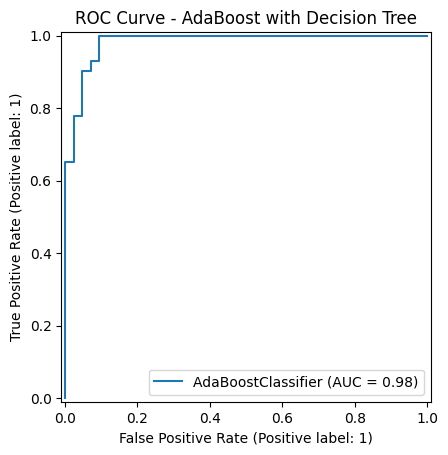

In [28]:
from sklearn.metrics import RocCurveDisplay

# Step 8: ROC Curve
RocCurveDisplay.from_estimator(ada, X_test, y_test)
plt.title("ROC Curve - AdaBoost with Decision Tree")
plt.show()


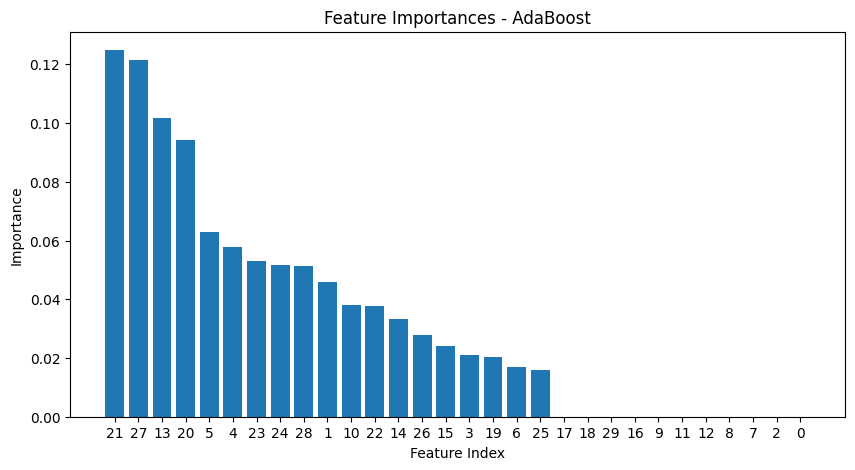

In [29]:
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances - AdaBoost")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()
